<a href="https://colab.research.google.com/github/rifkifakhrudin2004/PemogramanMesinSMT5/blob/main/Jobsheet09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Nama  : Rifki Fakhrudin
# # Kelas : 3C
# # Absen : 23

# # Perceptron dan ANN

# Praktikum 1

Langkah 1 - Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Langkah 2 - Load Data dan Visualisasi

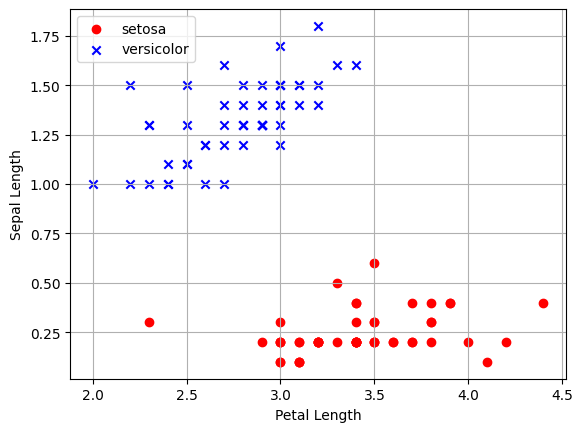

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/iris.csv')

setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

a, b = 'SepalWidthCm', 'PetalWidthCm'
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Langkah 3 - Membuat Kelas Perceptron

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Langkah 4 - Pilih Data dan Encoding Label


In [ ]:
# pilih 100 data awal
y = df.iloc[0:100, 5].values
# ganti coding label
y = np.where(y == 'Iris-setosa', -1, 1)
# slice data latih
X = df.iloc[0:100, [1, 4]].values

y = np.array(y, dtype='float')
X = np.array(X, dtype='float')

Langkah 5 - Fitting Model

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

Langkah 6 - Visualisasi Nilai Error Per Epoch

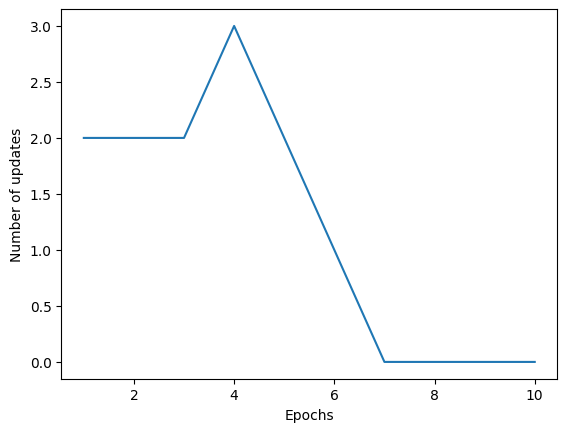

In [ ]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Langkah 7 - Visualiasasi Decision Boundary

<ipython-input-21-9c1631015b95>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


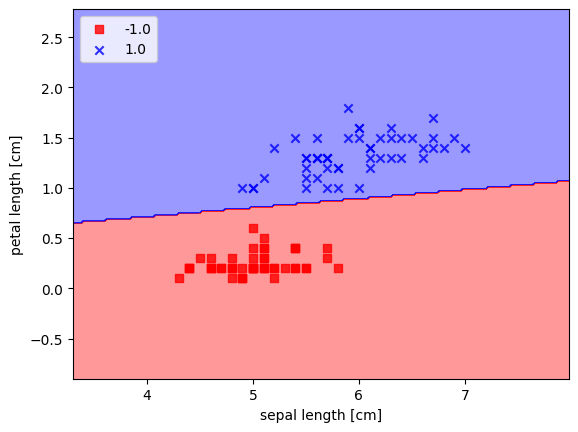

In [ ]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Praktikum 2

Langkah 1 - Import Library

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

Langkah 2 - Pilih Label dan Split Data

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



# Praktikum 3

Langkah 1 - Import Library

In [ ]:
from sklearn.neural_network import MLPClassifier

Langkah 2 - Buat Data

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

Langkah 3 - Fit Model

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

Langkah 4 - Prediksi

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# Praktikum 4

**Pra Pengolahan Data**




Langkah 1 - Import Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

Langkah 2 - Load Data

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


Langkah 3 - Encoding Data Kategorikal

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


Langkah 5 - Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Langkah 6 - Scaling Fitur

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Membuat Model ANN**

Langkah 1 - Inisiasi Model ANN

In [ ]:
ann = tf.keras.models.Sequential()

Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Langkah 3 - Membuat Hidden Layer Kedua

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Langkah 4 - Membuat Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Training Model**

Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Langkah 2 - Fitting Model

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8613 - loss: 0.3399
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8656 - loss: 0.3302
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8586 - loss: 0.3392
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8616 - loss: 0.3358
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8601 - loss: 0.3378
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8650 - loss: 0.3288
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8563 - loss: 0.3379
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8614 - loss: 0.3423
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8584 - loss: 0.3354
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8591 - loss: 0.3392
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8660 - loss: 0.3296
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

Langkah 2 - Fitting Model

Membuat Prediksi
Diberikan informasi sebagai berikut,

*   Geography: France
*   Credit Score: 600
*   Gender: Male
*   Age: 40 years old
*   Tenure: 3 years
*   Balance: $ 60000

*   Number of Products: 2
*   Does this customer have a credit card ? Yes
*   Is this customer an Active Member: Yes
*   Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?




Modelkan Data Baru dan Buat Prediksi

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[False]]


Prediksi Dengan Data Testing

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Cek Akurasi dan Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1519   76]
 [ 201  204]]


0.8615

# Tugas

Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
Anda diperbolehkan melakukan eksplorasi terhadap,

*   Metode pra pengolahan
*   Pemilihan fitur
*   Arsitektur ANN
*   Fungsi Aktiviasi

ANN diimplementasikan dengan menggunakan tensorflow.
DIKERJAKAN SECARA BERKELOMPOK
JELASKAN HASIL YANG ANDA DAPATKAN,


*   AKURASI

*   CONFUSION MATRIX
*   KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN




Load Library

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from tensorflow.keras.optimizers import Adam

Load data

In [ ]:
# Unduh dataset MNIST dari scikit-learn
mnist = fetch_openml('mnist_784')

In [ ]:
# Pisahkan data gambar dan label
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

**Pra-pemrosesan**

Scaling

In [ ]:
X /= 255.0

**Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Ektraksi Fitur**

In [ ]:
# Inisialisasi objek PCA dengan jumlah komponen yang diinginkan (misalnya, 100 komponen)
n_components = 200  # Ubah sesuai dengan kebutuhan Anda
pca = PCA(n_components=n_components)

# Fit-transform pada data pelatihan
X_train_pca= pca.fit_transform(X_train)

# Transformasi data pengujian
X_test_pca = pca.transform(X_test)

**Arsitektur Model ANN**

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(n_components,)),
    #layers.Input(shape = n_components),
    layers.Dense(n_components, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Kompilasi Model**

In [ ]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,714 (209.82 KB)

 Trainable params: 53,714 (209.82 KB)

 Non-trainable params: 0 (0.00 B)

**Training Model**

In [ ]:
history = model.fit(X_train_pca, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8549 - loss: 0.5244 - val_accuracy: 0.9609 - val_loss: 0.1283
Epoch 2/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9763 - loss: 0.0858 - val_accuracy: 0.9685 - val_loss: 0.1040
Epoch 3/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9855 - loss: 0.0470 - val_accuracy: 0.9684 - val_loss: 0.1000
Epoch 4/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9917 - loss: 0.0307 - val_accuracy: 0.9702 - val_loss: 0.1033
Epoch 5/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9940 - loss: 0.0182 - val_accuracy: 0.9730 - val_loss: 0.0942
Epoch 6/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9961 - loss: 0.0133 - val_accuracy: 0.9732 - val_loss: 0.0995
Epoch 7/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9971 - loss: 0.0098 - val_accuracy: 0.9731 - val_loss: 0.1115
Epoch 8/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9971 - loss: 0.0096 - 

In [ ]:
# Kemudian Anda dapat mengakses informasi seperti ini:
loss = history.history['loss']  # Histori nilai loss pada setiap epoch
val_loss = history.history['val_loss']  # Histori nilai loss pada setiap epoch saat validasi
accuracy = history.history['accuracy']  # Histori nilai akurasi pada setiap epoch
val_accuracy = history.history['val_accuracy']  # Histori nilai akurasi pada setiap epoch saat validasi

print("Loss:")
print(loss)

print("Validation Loss:")
print(val_loss)

print("Accuracy:")
print(accuracy)

print("Validation Accuracy:")
print(val_accuracy)

Loss:
[0.27112340927124023, 0.0869775116443634, 0.05010688304901123, 0.03154512122273445, 0.019714010879397392, 0.016202518716454506, 0.013267643749713898, 0.012297412380576134, 0.00874026957899332, 0.008661403320729733, 0.01366888452321291, 0.0072776032611727715, 0.008410818874835968, 0.008905439637601376, 0.0077603720128536224, 0.007141266483813524, 0.007587434258311987, 0.006712408736348152, 0.006274799816310406, 0.003997432067990303]
Validation Loss:
[0.12826859951019287, 0.10398095101118088, 0.10000487416982651, 0.1032966747879982, 0.09423794597387314, 0.09947233647108078, 0.11152027547359467, 0.12111571431159973, 0.1214774027466774, 0.14048947393894196, 0.1262047439813614, 0.14125405251979828, 0.15475495159626007, 0.15519411861896515, 0.1623726487159729, 0.15761123597621918, 0.15356673300266266, 0.17774319648742676, 0.18275238573551178, 0.19180259108543396]
Accuracy:
[0.9238839149475098, 0.9748883843421936, 0.9844642877578735, 0.9904464483261108, 0.9938169717788696, 0.99477678537

**Evaluasi Model**

Membuat Prediksi

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


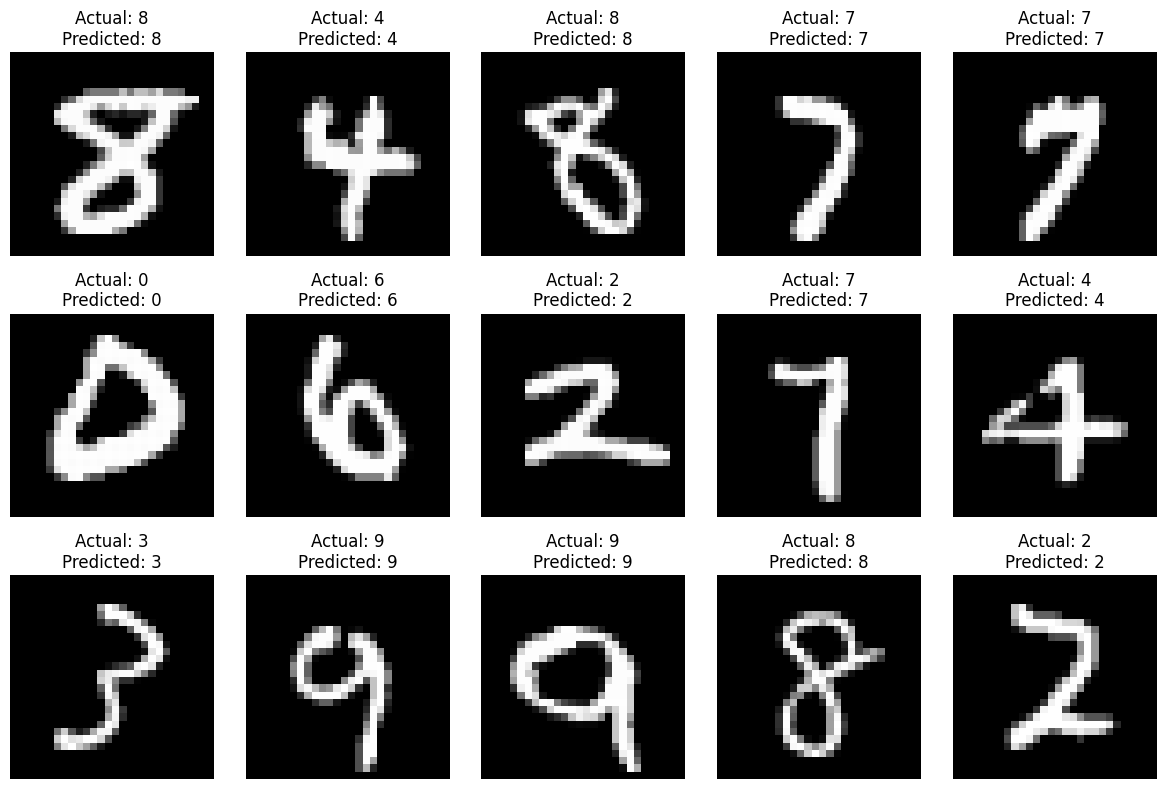

In [ ]:
# Membuat prediksi pada data pengujian
predictions = model.predict(X_test_pca)
y_pred = np.argmax(predictions, axis=1)

# Menampilkan beberapa contoh hasil prediksi
num_examples_to_show = 15  # Ubah sesuai kebutuhan

# Mengatur tata letak subplot menjadi 3 baris dan 5 kolom (3x5)
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

for i in range(num_examples_to_show):
    sample_image = X_test.iloc[i].values
    actual_label = y_test.iloc[i]
    predicted_label = y_pred[i]

    # Menampilkan gambar di subplot yang sesuai
    ax = axes[i // 5, i % 5]
    ax.imshow(sample_image.reshape(28, 28), cmap='gray')

    # Memeriksa apakah label sesuai
    if actual_label == predicted_label:
        title_color = 'black'
    else:
        title_color = 'red'

    ax.set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

**Akurasi**

In [ ]:
test_loss, test_acc = model.evaluate(X_test_pca, y_test)
print(f'Akurasi pada data pengujian: {test_acc:.2f}')

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9702 - loss: 0.2142
Akurasi pada data pengujian: 0.97


In [ ]:
train_loss, train_acc = model.evaluate(X_train_pca, y_train)
print(f'Akurasi pada data pelatihan: {train_acc:.2f}')

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9977 - loss: 0.0102
Akurasi pada data pelatihan: 0.99


**Confusion Matriks**

In [ ]:
# Membuat matriks kebingungan
confusion = confusion_matrix(y_test, y_pred)
print('Matriks Kebingungan:')
print(confusion)

Matriks Kebingungan:
[[1315    1    4    0    3    1    9    4    4    2]
 [   0 1577    7    5    1    0    4    6    0    0]
 [   0    4 1334    3    7    1    3   13   13    2]
 [   1    0   18 1383    0    7    2    5   12    5]
 [   2    0    3    0 1254    0    3    7    2   24]
 [   3    4    0   21    2 1226   11    2    3    1]
 [   2    0    1    0   12    2 1375    0    4    0]
 [   2    0    9    1    4    0    0 1481    1    5]
 [   3    5   25   13    3   15    6    4 1279    4]
 [   6    2    1   10   17    2    1   21   10 1350]]


# Akurasi
*   Akurasi pada Data Pelatihan:
Hasil menunjukkan akurasi sebesar 0.99 (99%). Ini menunjukkan bahwa model berhasil mengklasifikasikan 99% dari data pelatihan dengan benar. Kerugian (loss) model pada data pelatihan adalah 0.0102, yang menunjukkan bahwa model melakukan sedikit kesalahan dalam prediksi.

*   Akurasi pada Data Pengujian:
Untuk data pengujian, akurasi yang diperoleh adalah 0.97 (97%), dengan kerugian 0.2142. Ini menunjukkan bahwa model masih dapat menggeneralisasi dengan baik pada data yang tidak terlihat, meskipun akurasinya sedikit lebih rendah dibandingkan dengan data pelatihan.

# Model
*   Pra-pengolahan:
Data Normalisasi: Data gambar (pixel) dinormalisasi dengan membagi setiap nilai pixel dengan 255, sehingga berada dalam rentang [0, 1]. Ini membantu model dalam proses pelatihan dan mempercepat konvergensi.
Reduksi Dimensi: PCA (Principal Component Analysis) digunakan untuk mereduksi dimensi data dari 784 ke 200 komponen. Ini membantu mengurangi kompleksitas data dan meningkatkan kecepatan pelatihan tanpa mengorbankan terlalu banyak informasi.

*   Arsitektur Model:
Input Layer: Model dimulai dengan layer Flatten yang mengubah data 2D (28x28) menjadi 1D (200 komponen PCA).
Hidden Layers: Terdapat dua layer tersembunyi dengan aktivasi ReLU. Layer pertama memiliki 200 neuron dan layer kedua memiliki 64 neuron. Ini membantu model menangkap fitur kompleks dari data.
Output Layer: Layer output memiliki 10 neuron (satu untuk setiap kelas digit 0-9) dengan aktivasi softmax, yang menghasilkan distribusi probabilitas untuk masing-masing kelas.

*   Kompilasi dan Pelatihan:
Model menggunakan optimizer Adam dengan learning rate 0.001 dan loss function sparse_categorical_crossentropy untuk mengukur kesalahan prediksi.
Model dilatih selama 20 epoch, dengan split validasi 20% dari data pelatihan, memungkinkan pemantauan performa model selama pelatihan.

# Matriks
*   Analisis Matriks Kebingungan:
Matriks kebingungan menunjukkan performa model dalam mengklasifikasikan data pengujian. Setiap baris mewakili kelas yang sebenarnya, sedangkan setiap kolom mewakili kelas yang diprediksi.
Misalnya, dari total 1315 prediksi untuk kelas 0, hanya 1 yang salah diklasifikasikan sebagai kelas 1, dan 4 sebagai kelas 2, menunjukkan bahwa model sangat akurat dalam mengenali kelas 0.
Beberapa kesalahan dapat dilihat, seperti kelas 8 yang mengalami 25 prediksi salah untuk kelas 2, menunjukkan bahwa model mungkin kurang mampu membedakan antara kelas 2 dan kelas 8.

# Kesimpulan
*   Secara keseluruhan, model menunjukkan performa yang sangat baik dengan akurasi tinggi pada kedua data pelatihan dan pengujian. Matriks kebingungan memberikan wawasan lebih lanjut mengenai jenis kesalahan yang dibuat model dan area di mana model mungkin perlu diperbaiki. Konfigurasi model, mulai dari pra-pengolahan data hingga arsitektur ANN, berkontribusi pada keberhasilan dalam mengklasifikasikan dataset MNIST.











